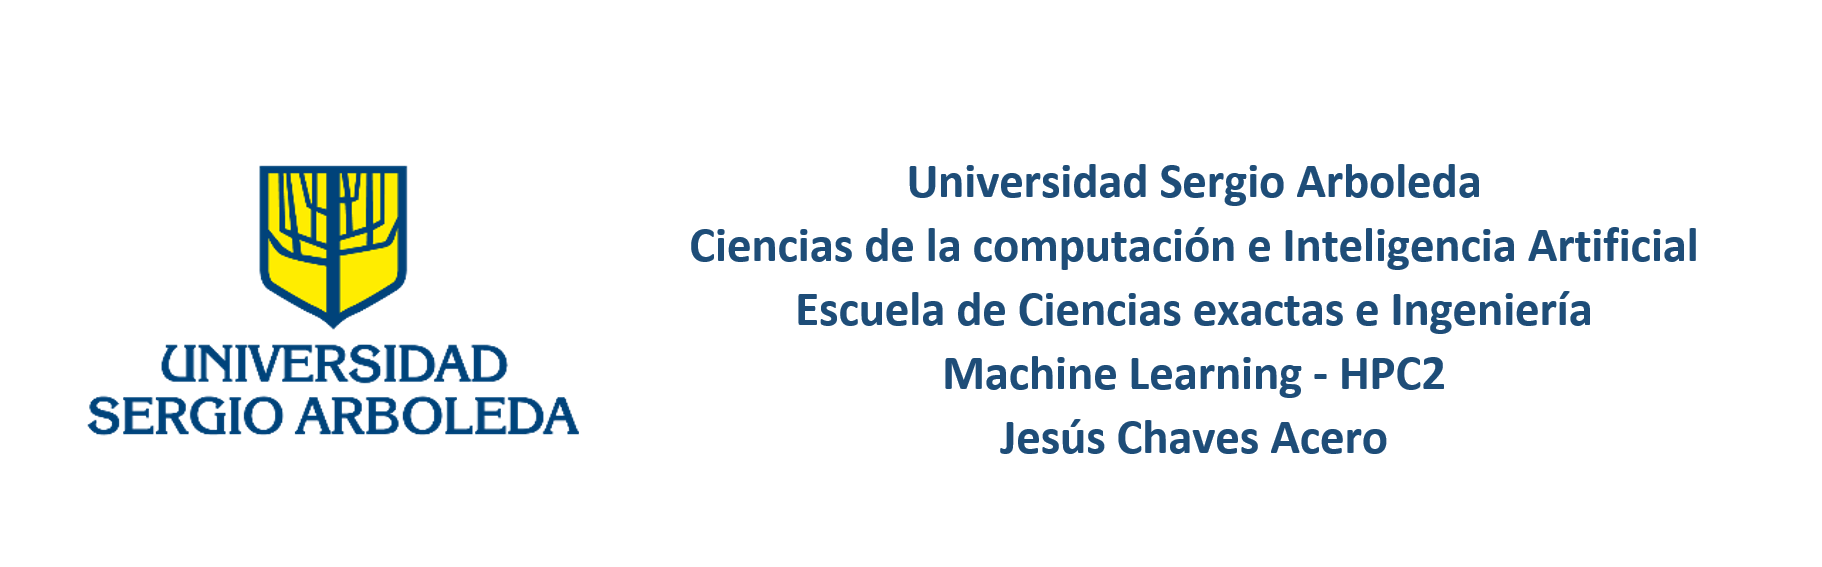
#**Regresion Lineal multivariable**

La regresión lineal múltiple trata de ajustar modelos lineales o linealizables entre una variable dependiente y más de una variables independientes. La regresión es una técnica estadística que consiste en calcular dicha correlacion entre par de variables en forma de función matemática. Esta función nos ofrece mucha más información sobre dicha relación. Por ejemplo, el modelo más sencillo: la regresión lineal simple, ya nos informa de las siguientes magnitudes: la magnitud de la correlación; el incremento marginal, el valor de una de ellas cuando la otra es cero y si dicha relación puede considerarse significativa o fuerte (distinta de una relación normal) o no significativa o débil (similar a una relación normal)

###**Scikit-Learn**

*Scikit-Learn* es una de estas librerías gratuitas para Python. Cuenta con algoritmos de clasificación, regresión, clustering y reducción de dimensionalidad. Además, presenta la compatibilidad con otras librerías de Python como NumPy, SciPy y matplotlib.

La gran variedad de algoritmos y utilidades de Scikit-learn la convierten en la herramienta básica para empezar a programar y estructurar los sistemas de análisis datos y modelado estadístico. Los algoritmos de Scikit-Learn se combinan y depuran con otras estructuras de datos y aplicaciones externas como Pandas o PyBrain.

*Modelo de regresión lineal Scikit-Learn:*
[enlace](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

*Ejemplo de regresion lineal sklearn:*
[enlace](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)


#**1. Importe de librerias:** Pandas, Numpy, Seaborn, Matplotlib

*- Adicional se importal el modelo de regresion lineal por **sklearn**.*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

##**1.1 Cargue del data set:** 
Realizamos el importe de nuestro data set [*insuranceHPC.csv*](https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/insuranceHPC.csv) y creamos nuestra variable ***dfInsurance*** la cual tendrá toda la información de nuestro data set, pero con los datos sin normalizar. En nuestro data set la ultima columna corresponderá a nuestras variables dependientes (***Target***), de manera que las columnas hacia la izquierda serán nuestras variables dependientes (***Features***).

In [2]:
dfInsurance = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/insuranceHPC.csv', sep=';')
dfInsurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


#**2. EDA (Exploratory data analysis):**

El análisis exploratorio de datos (EDA) sirve para analizar e investigar conjuntos de datos y resumir sus principales características, a menudo empleando métodos de visualización de datos. Ayuda a determinar la mejor manera de manipular las fuentes de datos para obtener las respuestas que necesita, lo que facilita a los científicos de datos descubrir patrones, detectar anomalías, probar una hipótesis o comprobar supuestos.

El EDA se usa principalmente para ver qué pueden revelar los datos más allá de la tarea formal de modelado o de prueba de hipótesis y proporciona una mejor comprensión de las variables del conjunto de datos y las relaciones entre ellas. También puede ayudar a determinar si las técnicas estadísticas que está implementando para el análisis de datos son apropiadas. Desarrollado originalmente por el matemático estadounidense John Tukey en los 70, las técnicas de EDA siguen siendo un método ampliamente utilizado en el proceso de descubrimiento de datos hoy en día.

Fuente: [IBM Análisis exploratorio de datos](https://www.ibm.com/co-es/cloud/learn/exploratory-data-analysis)

##**2.1 Informacion completa del dataset:** Tipos de dato. 

Para saber qué tipo de datos tiene nuestro dataFrame usaremos el método **`DataFrame.info()`** el cual mostrará el tipo de dato de cada una de nuestras variables. Proporciona información sobre los tipos de datos, columnas, recuentos de valores nulos, uso de memoria, etc.

Fuente: [pandas docs(DataFrame.info)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)

In [3]:
dfInsurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


El dataset no presenta valores nulos o vacios, por lo tanto, no hay que hacer ningun tratamiento.

##**2.2 Descripción de variables:**
0. age: edad del beneficiario principal.
1. sex: género del contratante del seguro, 0 para mujer, 1 para hombre.
2. bmi: índice de masa corporal, que proporciona una comprensión del cuerpo, los pesos que son relativamente altos o bajos en relación con la altura, índice objetivo de peso corporal (kg / m ^ 2) utilizando la relación entre la altura y el peso, idealmente 18,5 a 24,9.
3. children: Número de hijos cubiertos por el seguro médico / Número de personas a cargo.
4. smoker: Fumador. 0 para fumador, 1 para no fumador.
5. region: la zona de residencia del beneficiario en los EE.UU., noreste, sureste, suroeste, noroeste. En el dataset se representarán con datos categóricos que comprenden el rango de 0 a 3 respectivamente.
6. gastos: Gastos médicos individuales facturados por el seguro de enfermedad.

##**2.3 Exploración básica de datos**
 
El método **`DataFrame.describe()`** genera estadísticas descriptivas que resumen la tendencia central, la dispersión y la forma de la distribución de un conjunto de datos, excluyendo los valores de NaN. Este método nos dice muchas cosas sobre un conjunto de datos. Una cosa importante es que el método describe () trata solo con valores numéricos. No funciona con valores categóricos. Entonces, si hay valores categóricos en una columna, el método describe () lo ignorará y mostrará un resumen para las otras columnas a menos que se pase el parámetro include = "all".

In [4]:
dfInsurance.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.795217,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,1.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,1.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010



Ahora, entendamos las estadísticas que se generan con el método describe ():
* count: nos dice el número de filas vacías NoN en una característica.
* mean: nos dice el valor medio de esa característica.
* std: nos dice el valor de desviación estándar de esa característica.
* min: nos dice el valor mínimo de esa característica.
* 25%, 50% y 75% son el percentil / cuartil de cada característica. Esta información de cuartiles nos ayuda a detectar valores atípicos.
* max: nos dice el valor máximo de esa característica en el dataSet.

Fuente: [pandas docs(DataFrame.describe)](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html#pandas.DataFrame.describe)

##**2.4 Matriz de correlación:** Mapa de calor

Estas variables independientes o explicativas están dispuestas ya en una matriz de correlación, que es una tabla de doble entrada para cada una de nuestras variables, que muestra una lista multivariable horizontalmente y la misma lista verticalmente y con el correspondiente coeficiente de correlación llamado r o la relación entre cada pareja en cada celda, expresada con un número que va desde 0 a 1. El modelo mide y muestra la interdependencia en relaciones asociadas o entre cada pareja de variables y todas al mismo tiempo.

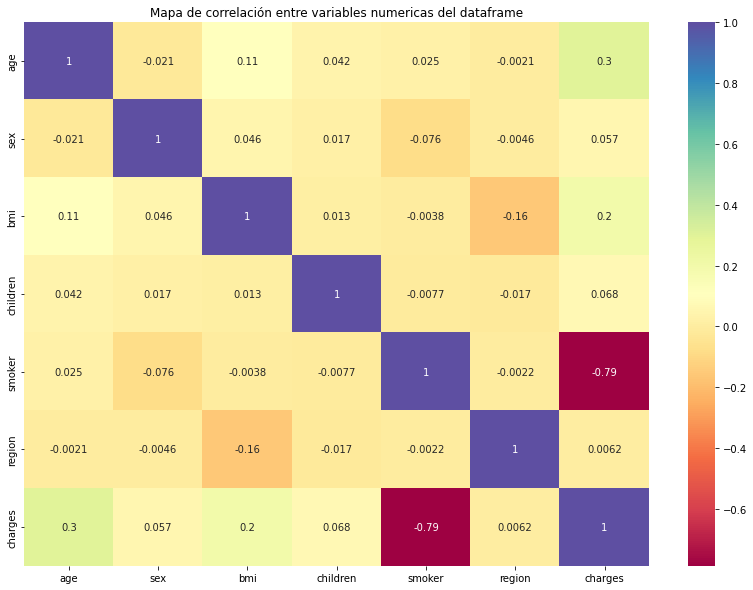

In [5]:
matCorrelacion = dfInsurance.corr()
plt.figure(figsize=(14,10))
sns.heatmap(matCorrelacion, annot=True, cmap='Spectral')
plt.title('Mapa de correlación entre variables numericas del dataframe')
plt.show()

Se observa una fuerte correlación sólo con el hecho de fumar del paciente, seguido tenemos una correlación más débil con la edad del paciente y seguido a este con su bmi(índice de masa corporal). Como solo una variable presenta una correlación fuerte se espera que el resultado de predicción del modelo no sea muy acertado al menos con el ajuste lineal que vamos a plantear. Más adelante realizaremos un análisis del tabaquismo con más detalle dado que es la variable de correlación más fuerte, también se realizará un estudio respecto a las variables de edad y bmi.

##**2.5 Visualización:** Par por variable

Trazar relaciones por pares en un conjunto de datos de forma predeterminada. Esta función creará una cuadrícula de ejes de modo que cada variable numérica del dataSet se comparta en los ejes y en una sola fila y los ejes x en una sola columna. Las gráficas diagonales se tratan de manera diferente: se dibuja una gráfica de distribución univariada para mostrar la distribución marginal de los datos en cada columna.

Fuente: [seaborn docs(seaborn.pairplot)](https://seaborn.pydata.org/generated/seaborn.pairplot.html)


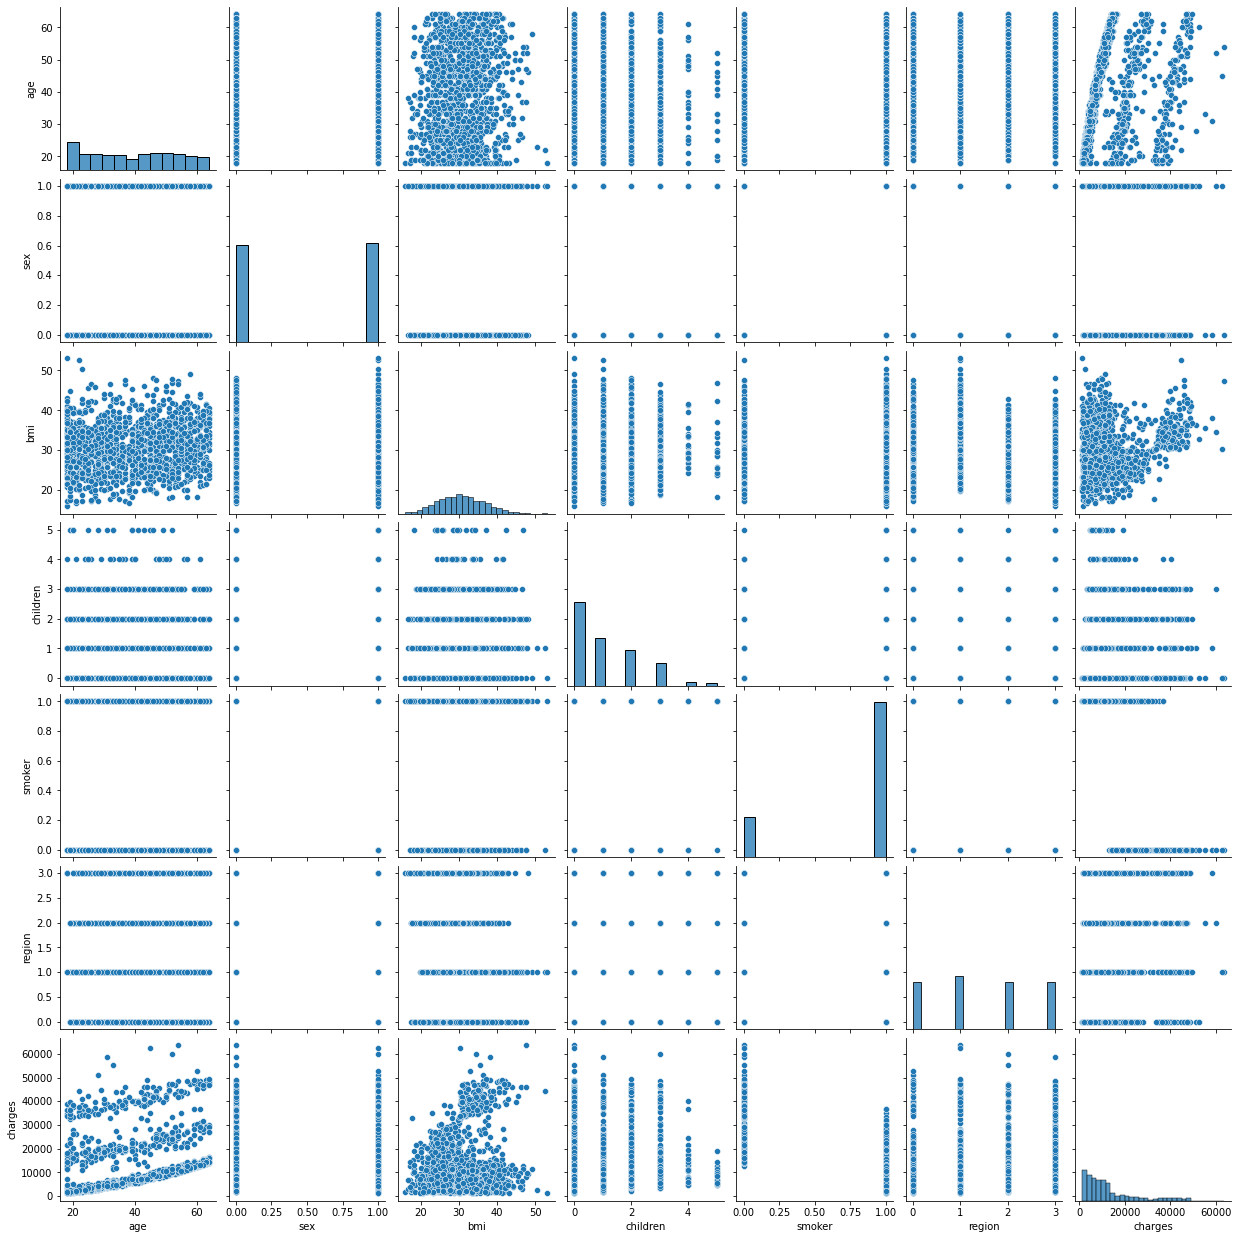

In [6]:
sns.pairplot(dfInsurance)

##**2.6 Distribución de las variables:**

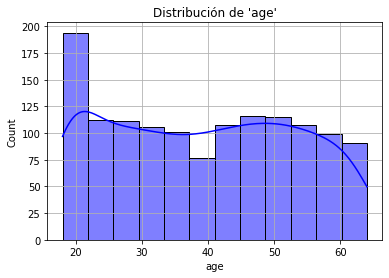

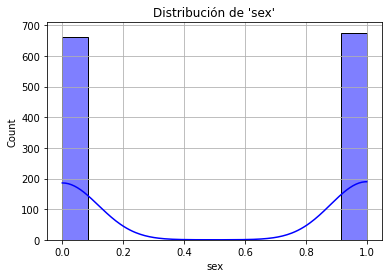

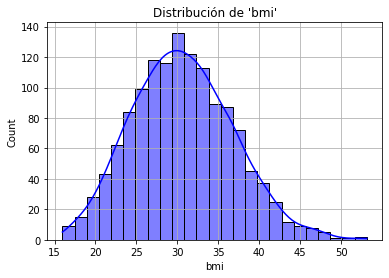

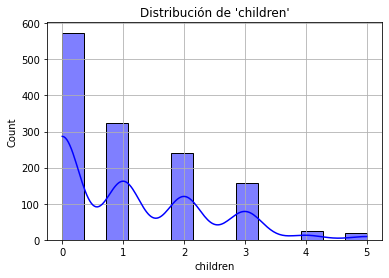

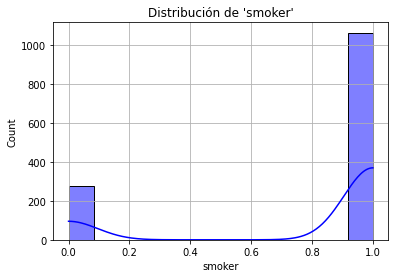

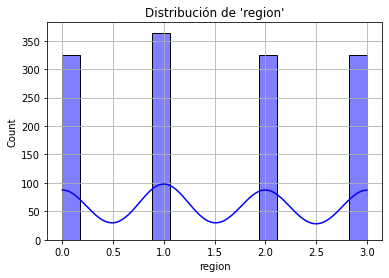

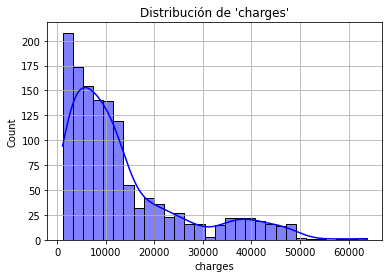

In [7]:
for i in dfInsurance.columns:
  plt.figure(figsize=(6,4))
  plt.title(f"Distribución de '{i}'")
  plt.grid()
  sns.histplot(dfInsurance[i], kde=True, color = 'b')

plt.show()

De acuerdo a las distribuciones se puede observar que la gran mayoría de pacientes en el dataSet corresponde a personas jóvenes entre los 18 y 22 años, seguido a esto se mantiene una cantidad medianamente uniforme hasta los 64 años aproximadamente y con un descenso de pacientes de los 37 a 41 años de edad. También se puede observar que la cantidad de pacientes hombres es levemente superior a las mujeres. Por otra parte, vemos que el bmi promedio en los pacientes es de 30. En su mayoría, los pacientes a estudiar no tienen hijos seguido de pacientes con un solo hijo. La mayoría de los pacientes no fuma, de los cuales solo un poco menos de 300 si lo hacen. La cantidad de pacientes por región es muy similar en las cuatro (noreste, sureste, suroeste, noroeste) teniendo un leve incremento en la región 1.

##**2.7 Análisis variable ('charges'):** Costo
 
Realizaremos un análisis independiente de nuestra variable a estudiar `'charges'` la cual corresponde al costo del tratamiento respecto a las variables con mayor correlación las cuales pudimos observar anteriormente como el tabaquismo, la edad y el bmi.

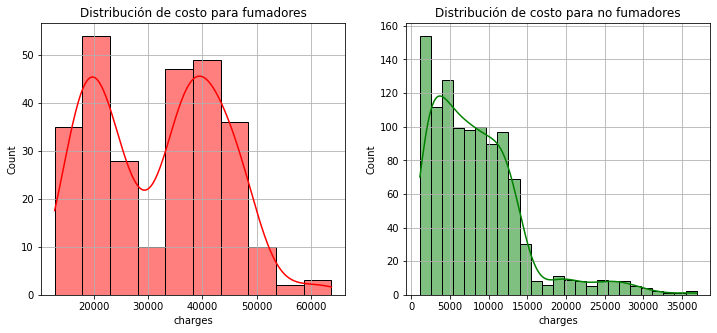

In [8]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(dfInsurance[(dfInsurance.smoker == 0)]["charges"], kde=True, color='r',ax=ax)
ax.set_title('Distribución de costo para fumadores')
plt.grid()
ax=f.add_subplot(122)
sns.histplot(dfInsurance[(dfInsurance.smoker == 1)]['charges'],kde=True, color='g',ax=ax)
ax.set_title('Distribución de costo para no fumadores')
plt.grid()

Los pacientes fumadores gastan más en el tratamiento. Hay que recordar que el número de pacientes no fumadores es mayor tal y como logramos observar en las gráficas de distribución.

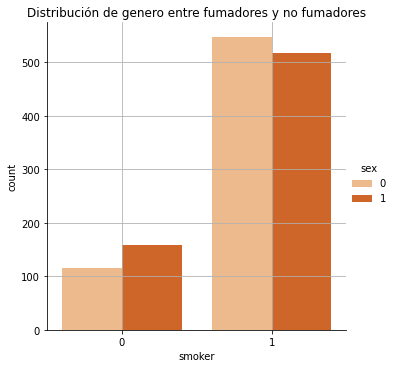

In [9]:
sns.catplot(x='smoker', kind='count',hue = 'sex', palette="Oranges", data=dfInsurance)
plt.title('Distribución de genero entre fumadores y no fumadores')
plt.grid()


Teniendo en cuenta que las mujeres se codifican con el símbolo '0' y los hombres '1' podemos notar que hay más hombres fumadores que mujeres fumadoras.

Text(0.5, 1.0, 'Costo del tratamiento respecto a la edad \nentre fumadores y no fumadores')

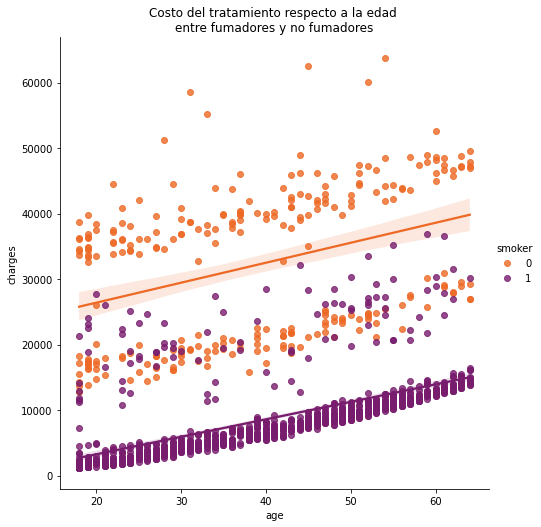

In [10]:
sns.lmplot(x='age', y='charges', hue='smoker', data=dfInsurance, palette = 'inferno_r', height=7)
plt.title('Costo del tratamiento respecto a la edad \nentre fumadores y no fumadores')

Como podemos observar tanto en los pacientes fumadores como en los no fumadores el coste del tratamiento aumenta con la edad, sin embargo, el costo de los pacientes que son fumadores es más elevado en su mayoría salvo casos especiales, independiente de la edad del paciente.

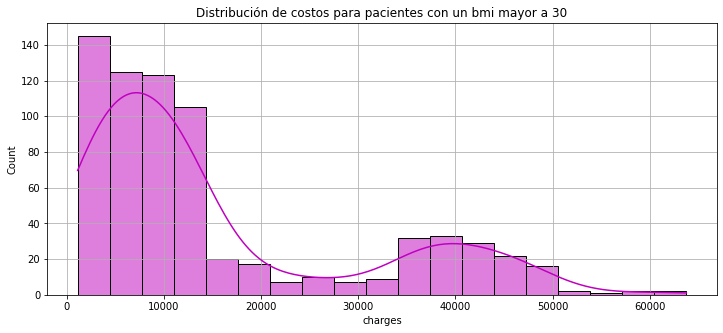

In [11]:
plt.figure(figsize=(12,5))
plt.title("Distribución de costos para pacientes con un bmi mayor a 30")
ax = sns.histplot(dfInsurance[(dfInsurance.bmi >= 30)]['charges'], kde=True, color = 'm')
plt.grid()

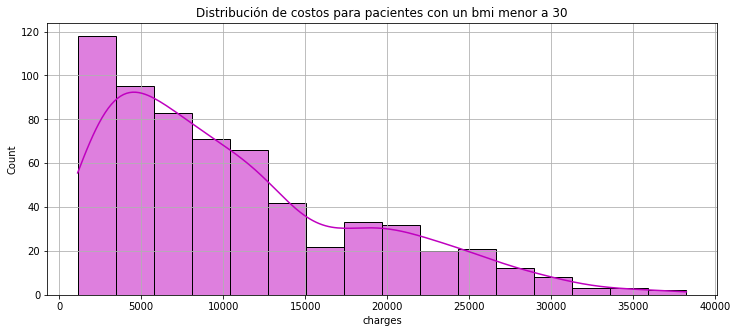

In [12]:
plt.figure(figsize=(12,5))
plt.title("Distribución de costos para pacientes con un bmi menor a 30")
ax = sns.histplot(dfInsurance[(dfInsurance.bmi < 30)]['charges'], kde=True, color = 'm')
plt.grid()

Podemos observar como el costo de tratamiento se incrementa en pacientes con un bmi mayor a 30, esto tiene sentido dado que un bmi mayor a 30 se empieza a considerar obesidad. Ahora vamos a ver qué relación hay entre fumar y el sobrepeso.

Text(0.5, 1.0, 'Grafico de dispersión de costo respecto al bmi \nentre fumadores y no fumadores')

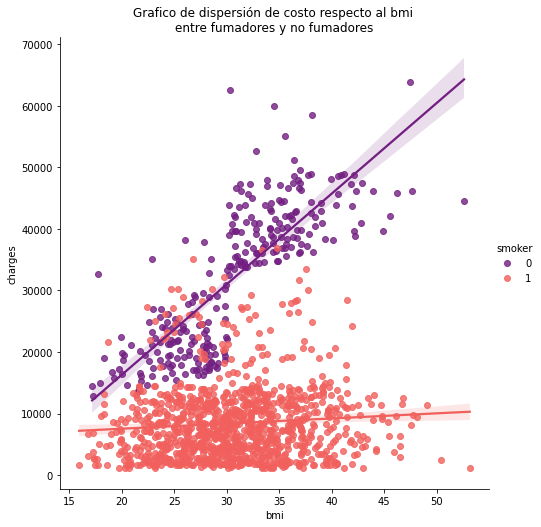

In [13]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=dfInsurance, palette = 'magma', height=7)
plt.title('Grafico de dispersión de costo respecto al bmi \nentre fumadores y no fumadores')

En este último gráfico podemos observar cómo un paciente que tenga un bmi alto y además de esto tenga el hábito de fumar el costo del tratamiento tenderá a aumentar.

#**3. Regresión Lineal:**

La regresión lineal múltiple trata de ajustar modelos lineales o linealizables entre una variable dependiente y más de una variables independientes. La regresión es una técnica estadística que consiste en calcular dicha correlacion entre par de variables en forma de función matemática. Esta función nos ofrece mucha más información sobre dicha relación. Por ejemplo, el modelo más sencillo: la regresión lineal simple, ya nos informa de las siguientes magnitudes: la magnitud de la correlación; el incremento marginal, el valor de una de ellas cuando la otra es cero y si dicha relación puede considerarse significativa o fuerte (distinta de una relación normal) o no significativa o débil (similar a una relación normal).

##**3.1 Identificar y separar variables:**

Se ajusta nuestro dataFrame al modelo de regresión lineal, para esto separaremos nuestras ***features (variables independientes)*** de nuestra variable ***target (variable dependiente)*** en nuestro caso es la variable **'charges'**, de la siguiente manera:

In [14]:
X = dfInsurance.drop(['charges'], axis=1)
y = dfInsurance['charges']

##**3.2 Dividir en grupos de entrenamiento y prueba:**
 
Para entrenar nuestro modelo de Regresión y poder saber si está funcionando bien, separaremos el conjunto de datos inicial en 2: conjunto de entrenamiento (train) y conjunto de pruebas (test). Por lo general se divide haciendo “80-20”. En este caso no tomaremos muestras aleatorias de nuestro data Frame por lo cual indicaremos en la función `shuffle=False`.


In [15]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

##**3.3 Creación del modelo de entrenamiento:**
 
**Pipeline** ss una “tubería” que consiste en una cadena de procesos conectados de forma tal que la salida de cada elemento de la cadena es la entrada del próximo. Permiten la comunicación y sincronización entre procesos. Es común el uso de búfer de datos entre elementos consecutivos.
 
Acontinuación podemos ver un ejemplo de  [sklearn.pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) y entender un poco mas su funcionamiento.



In [16]:
pipe = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('LR', LinearRegression())])

##**3.4 Predicciones de entrenamiento y prueba por sklearn:**

A continuación creamos una variable la cual va a contener las predicciones para nuestro modelo de entrenamiento realizado en python con sklearn.

In [17]:
y_hat_train_sk = pipe.predict(X_train)
y_hat_test_sk = pipe.predict(x_test)

##**3.5 Coeficientes θ y punto de corte modelo sklearn:**
 
Ecuación de una recta: y = mx + b
 
En esta ecuación, “y” representa los valores de la coordenada a lo largo del eje vertical en el gráfico (ordenada); en tanto que “x” indica la magnitud de la coordenada sobre el eje horizontal (abscisa). El valor de “b” (que puede ser negativo, positivo o igual a cero) es llamado el intercepto; en tanto que el valor de “m” (el cual puede ser negativo o positivo) se denomina la pendiente o coeficiente de regresión.
 
Los coeficientes de regresión representan los cambios medios en la variable de respuesta para una unidad de cambio en la variable predictor mientras se mantienen constantes los otros predictores en el modelo. Este control estadístico que proporciona la regresión es importante porque aísla el papel de una variable de todas las otras del modelo. La clave para entender los coeficientes es pensar en ellos como pendientes.
 
Fuente: [Machine learning con Python y Scikit-learn](https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html)

In [18]:
LR = LinearRegression()
LR.fit(X_train, y_train)
estimate_sk = pd.DataFrame(zip(X.columns, LR.coef_), columns=['features', 'thetha(θ) Sklearn'])
print('Punto de corte o intercepto: ', LR.intercept_)
print('coeficientes θ: ')
estimate_sk

Punto de corte o intercepto:  10522.093373556294
coeficientes θ: 


,features,thetha(θ) Sklearn
0,age,259.915840
1,sex,-246.709657
2,bmi,334.508206
3,children,441.816513
4,smoker,-23631.789247
5,region,437.181701


#**4. Comparativa con el modelo artesanal realizado en C++:**
 
Se evaluará la similitud entre el modelo de python con sklearn contra el modelo realizado en C++ con la data normalizada y optimizando la función de costo mediante el cálculo del gradiente descendiente en C++. El Gradiente Descendente es un algoritmo computacional que permite determinar de forma automática el mínimo de una función matemática.Para ello hace uso de el gradiente (o derivada) de dicha función, que permite “guiar” al algoritmo para de manera progresiva acercarse al mínimo ideal de dicha función.
 
A continuación importamos el fichero generado por el modelo de Regresión Lineal en C++ el cual corresponde a nuestra función de costo optimizada(Gradiente descendiente).

In [19]:
costo = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/Modelo%20C%2B%2B/Ficheros%20C%2B%2B/VectorCosto.txt')
costo

,0.493277
0,0.485931
1,0.478733
2,0.471680
3,0.464767
4,0.457993
...,...
995,0.124055
996,0.124055
997,0.124055
998,0.124055


#**4.1 Gráfica de la función de costo en el modelo de C++:**
 
A continuación se  grafica la función de costo de nuestro modelo artesanal


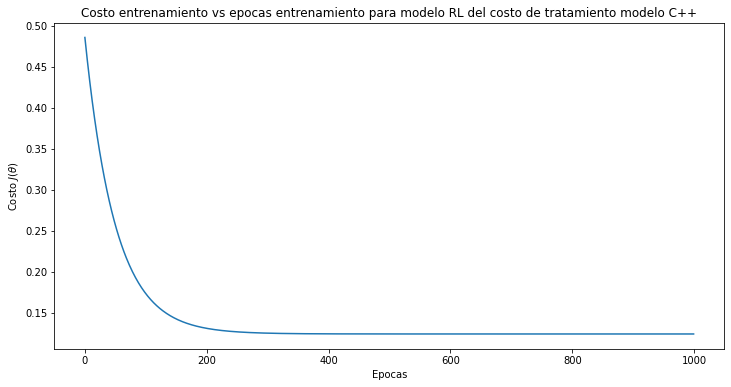

In [20]:
fig, axes = plt.subplots(figsize=(12,6))

axes.plot(costo)
axes.set_title('Costo entrenamiento vs epocas entrenamiento para modelo RL del costo de tratamiento modelo C++')
axes.set_xlabel('Epocas')
axes.set_ylabel(r'Costo $J(\theta)$')
plt.show()

En la gráfica anterior se puede observar como el costo disminuye con cada iteración hasta converger a el mínimo de la función que es lo que buscamos con el cálculo del gradiente descendiente.

#**4.2 Importe de las predicciones de entrenamiento y prueba realizadas mediante el modelo en C++:**

Se importan los ficheros generados por el modelo realizado en C++ con las predicciones de entrenamiento y prueba.

In [21]:
y_hat_train_cpp = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/Modelo%20C%2B%2B/Ficheros%20C%2B%2B/y_train_hat.txt', header=None)
print(y_hat_train_cpp)
y_hat_test_cpp = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/Modelo%20C%2B%2B/Ficheros%20C%2B%2B/y_test_hat.txt', header=None)
print(y_hat_test_cpp)

             0
0     24791.80
1      3498.19
2      6723.43
3      3691.00
4      5496.55
...        ...
1065   6711.83
1066  12914.80
1067  12360.60
1068  11580.70
1069  12475.50

[1070 rows x 1 columns]
            0
0    33170.50
1    14848.90
2     3431.91
3    12781.30
4     9929.90
..        ...
263  12199.60
264   3557.55
265   4332.46
266    979.06
267  36973.60

[268 rows x 1 columns]


#**4.3 Comparación modelo python sklearn vs modelo C++ (entrenamiento):**

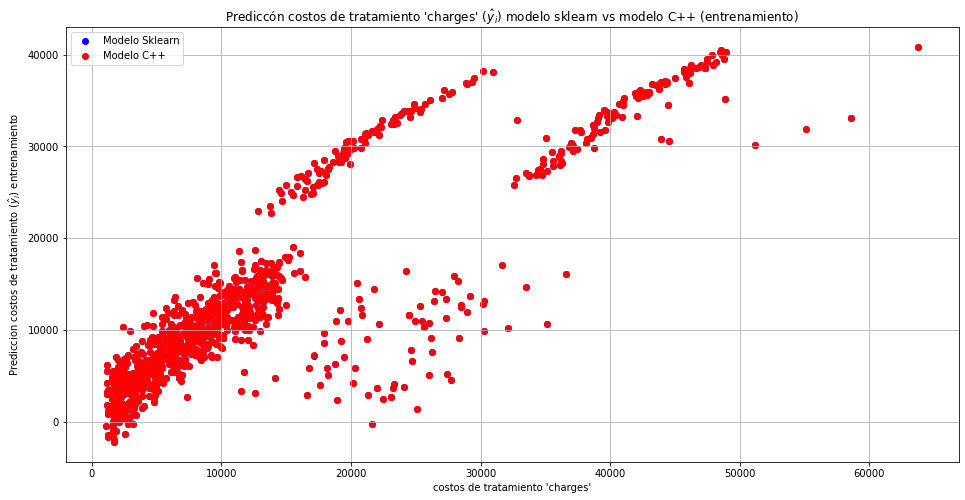

In [22]:
fig, axes = plt.subplots(figsize=(16,8))

plt.scatter(y_train, y_hat_train_sk, c='b', label='Modelo Sklearn')
plt.scatter(y_train, y_hat_train_cpp, c='r', label='Modelo C++')
axes.set_title('Prediccón costos de tratamiento \'charges\' ($\haty_i)$ modelo sklearn vs modelo C++ (entrenamiento)')
axes.set_xlabel('costos de tratamiento \'charges\'')
axes.set_ylabel('Prediccion costos de tratamiento ($\haty_i)$ entrenamiento')
plt.legend(loc=2)
plt.grid()
plt.show()

In [23]:
df_train = pd.DataFrame({'Actual': y_train, 'Predicciones sklearn (entrenamiento)': y_hat_train_sk, 'Predicciones C++ (entrenamiento)': y_hat_train_cpp[0].tolist()})
df_train

,Actual,Predicciones sklearn (entrenamiento),Predicciones C++ (entrenamiento)
0,16884.92400,24793.273268,24791.80
1,1725.55230,3497.419906,3498.19
2,4449.46200,6722.640010,6723.43
3,21984.47061,3690.189390,3691.00
4,3866.85520,5495.861722,5496.55
...,...,...,...
1065,7045.49900,6711.643509,6711.83
1066,8978.18510,12914.180491,12914.80
1067,5757.41345,12360.304835,12360.60
1068,14349.85440,11579.920015,11580.70


#**4.3 Comparación modelo python sklearn vs modelo C++ (prueba):**

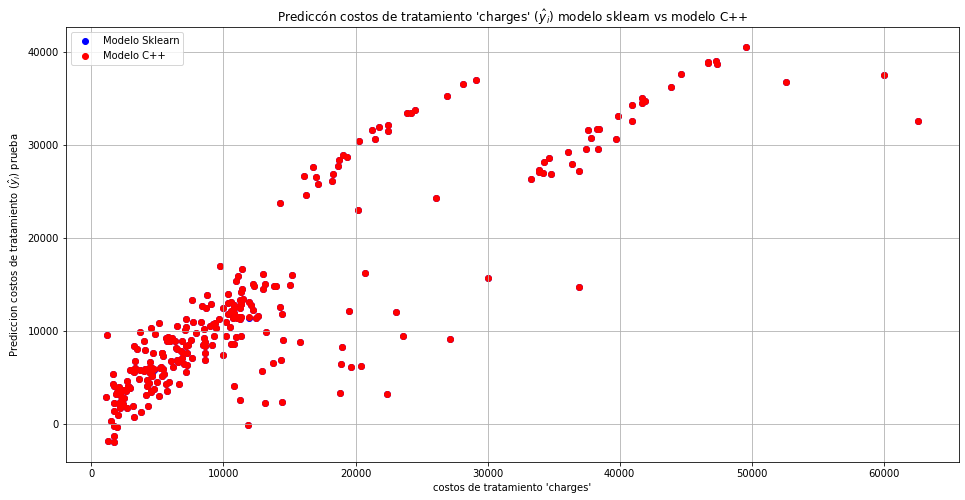

In [24]:
fig, axes = plt.subplots(figsize=(16,8))

plt.scatter(y_test, y_hat_test_sk, c='b', label='Modelo Sklearn')
plt.scatter(y_test, y_hat_test_cpp, c='r', label='Modelo C++')
axes.set_title('Prediccón costos de tratamiento \'charges\' ($\haty_i)$ modelo sklearn vs modelo C++')
axes.set_xlabel('costos de tratamiento \'charges\'')
axes.set_ylabel('Prediccion costos de tratamiento ($\haty_i)$ prueba')
plt.legend(loc=2)
plt.grid()
plt.show()

In [25]:
df_train = pd.DataFrame({'Actual': y_test, 'Predicciones sklearn (prueba)': y_hat_test_sk, 'Predicciones C++ (prueba)': y_hat_test_cpp[0].tolist()})
df_train

,Actual,Predicciones sklearn (prueba),Predicciones C++ (prueba)
1070,39871.70430,33171.487185,33170.50
1071,13974.45555,14848.447997,14848.90
1072,1909.52745,3431.244475,3431.91
1073,12096.65120,12781.534576,12781.30
1074,13204.28565,9930.007557,9929.90
...,...,...,...
1333,10600.54830,12198.918523,12199.60
1334,2205.98080,3557.836271,3557.55
1335,1629.83350,4332.598324,4332.46
1336,2007.94500,978.848468,979.06


Como podemos observar el modelo realizado mediante C++ es muy similar al realizado con sklearn, difiere en valores mínimos.

In [26]:
theta_out_cpp = pd.read_csv('https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/Modelo%20C%2B%2B/Ficheros%20C%2B%2B/VectorTheta.txt', header=None)
estimate_cpp = pd.DataFrame(zip(X.columns, theta_out_cpp[0]), columns=['features', 'thetha() C++'])
estimate_cpp

,features,thetha() C++
0,age,0.301550
1,sex,-0.010155
2,bmi,0.168437
3,children,0.043982
4,smoker,-0.787725
5,region,0.039876


##**5. Valoración del los modelos:** Métrica R2 Score
 
En estadística, el coeficiente de determinación , denominado R2 o r2 es la proporción de la variación en la variable dependiente que es predecible a partir de la(s) variable(s) independiente(s).
 
Es una estadística utilizada en el contexto de modelos estadísticos cuyo objetivo principal es la predicción de resultados futuros o la prueba de hipótesis, sobre la base de otra información relacionada. Proporciona una medida de qué tan bien el modelo replica los resultados observados, en función de la proporción de la variación total de los resultados explicada por el modelo. La puntuación varía en los rangos entre 0 y 1, la mejor puntuación posible es 1,0 y puede ser negativa (porque el modelo puede ser arbitrariamente peor).

In [27]:
pipe.score(X_train, y_train)

0.7485033969376796

Puntuacion R2 Score C++:

![R2 Score_cpp.PNG](https://raw.githubusercontent.com/jchaves1406/ML-HPC-2/main/Regresion%20Lineal/Modelo%20C%2B%2B/Ficheros%20C%2B%2B/Utils/unnamed.png)

Como podemos ver, la puntuación generada por ambos modelos es prácticamente la misma debido a la similitud entre ambos modelos. La puntuación obtenida nos dice que aproximadamente el 74.85% de nuestra variable a predecir 'charges' puede ser explicada a partir de nuestras variables independientes o features. Si bien el modelo no es malo, podemos decir que aun no llega a un nivel de confiabilidad deseado, esto podría mejorarse realizando otra clase de regresión para obtener un nuevo modelo o utilizar mas dimensiones(features) para enriquecer el modelo, idealmente nuevas variables que tengan una correlación mas fuerte con la variable a predecir.